In [59]:
import os
import matplotlib.pyplot as plt
from src.data.dataset_blond import BLOND
from src.data.dataset_blond import TYPE_CLASS
from src.features.features import *
import pandas as pd
import numpy as np
import librosa

In [60]:
dataset = BLOND('all', '../data/')
dataset.labels

,Medal,Socket,Appliance,Type,Timestamp,fold,Class,Weight
0,1,4,Dell U2713Hb,Monitor,2016-11-07 08_52_05.218924800+01_00,train,4.0,1.258201
1,1,4,Dell U2713Hb,Monitor,2016-11-07 08_55_48.866275200+01_00,train,4.0,1.258201
2,1,4,Dell U2713Hb,Monitor,2016-11-07 09_00_53.747164800+01_00,train,4.0,1.258201
3,1,4,Dell U2713Hb,Monitor,2016-11-07 09_17_37.822041600+01_00,test,4.0,1.258201
4,1,4,Dell U2713Hb,Monitor,2016-11-07 10_20_07.946736+01_00,train,4.0,1.258201
...,...,...,...,...,...,...,...,...
3255,14,1,Lenovo L540,Laptop,2016-11-29 19_06_09.861638400+01_00,train,3.0,7.688679
3256,14,1,Lenovo L540,Laptop,2016-11-30 10_25_04.093536+01_00,test,3.0,7.688679
3257,14,1,Lenovo L540,Laptop,2016-11-30 14_05_31.831756800+01_00,test,3.0,7.688679
3258,14,1,Lenovo L540,Laptop,2016-11-30 15_59_40.749907200+01_00,train,3.0,7.688679


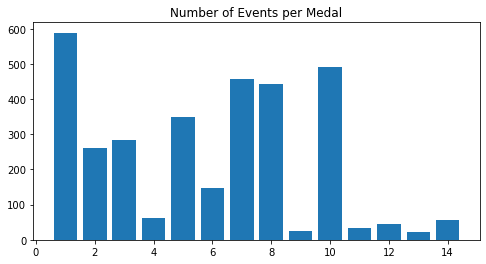

In [61]:
tmp = dataset.labels.groupby(['Medal']).count()
plt.figure(figsize=(8,4))
plt.bar(x=tmp.index, height=tmp['Socket'])
plt.title('Number of Events per Medal')
plt.show()

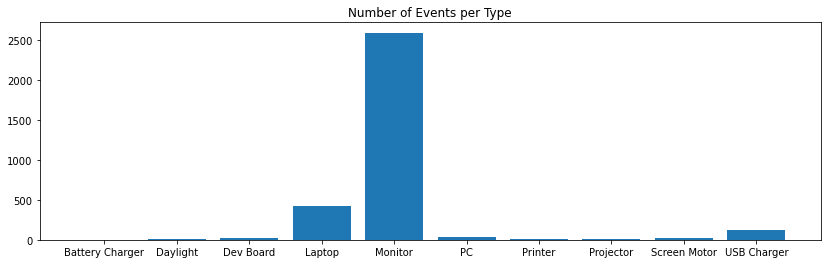

In [62]:
tmp = dataset.labels.groupby(['Type']).count()
plt.figure(figsize=(14,4))
plt.bar(x=tmp.index, height=tmp['Medal'])
plt.title('Number of Events per Type')
plt.show()

<ipython-input-63-f1527f12477d>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 7, i * 7 + 1)
<ipython-input-63-f1527f12477d>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 7, i * 7 + 2)
<ipython-input-63-f1527f12477d>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will alway

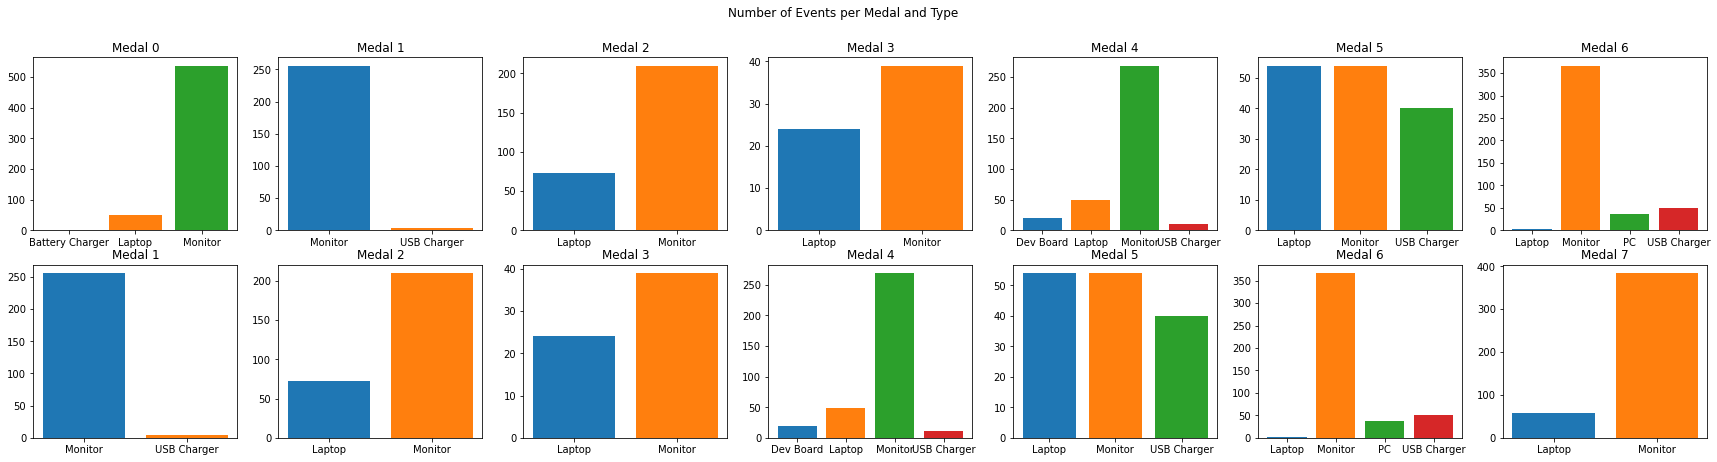

In [63]:
tmp = dataset.labels.groupby(['Medal', 'Type']).count()
plt.figure(figsize=(30, 7))
plt.suptitle('Number of Events per Medal and Type')

for i in range(0, 2):
    for idx in tmp.index:

        if idx[0] == i+1:
            plt.subplot(2, 7, i * 7 + 1)

            plt.bar(x=idx[1], height=tmp[tmp.index==idx]['Socket'])
            plt.title(f'Medal {i}')

        if idx[0] == i+2:
            plt.subplot(2, 7, i * 7 + 2)
            plt.bar(x=idx[1], height=tmp[tmp.index==idx]['Socket'])
            plt.title(f'Medal {i+1}')

        if idx[0] == i+3:
            plt.subplot(2, 7, i * 7 + 3)
            plt.bar(x=idx[1], height=tmp[tmp.index==idx]['Socket'])
            plt.title(f'Medal {i+2}')

        if idx[0] == i+4:
            plt.subplot(2, 7, i * 7 + 4)
            plt.bar(x=idx[1], height=tmp[tmp.index==idx]['Socket'])
            plt.title(f'Medal {i+3}')

        if idx[0] == i+5:
            plt.subplot(2, 7, i * 7 + 5)
            plt.bar(x=idx[1], height=tmp[tmp.index==idx]['Socket'])
            plt.title(f'Medal {i+4}')

        if idx[0] == i+6:
            plt.subplot(2, 7, i * 7 + 6)
            plt.bar(x=idx[1], height=tmp[tmp.index==idx]['Socket'])
            plt.title(f'Medal {i+5}')

        if idx[0] == i+7:
            plt.subplot(2, 7, i * 7 + 7)
            plt.bar(x=idx[1], height=tmp[tmp.index==idx]['Socket'])
            plt.title(f'Medal {i+6}')
plt.show()

In [64]:
num_examples = 4
idx = np.random.choice(len(dataset), size=num_examples, replace=False)
class_type = {v: k for k, v in TYPE_CLASS.items()}

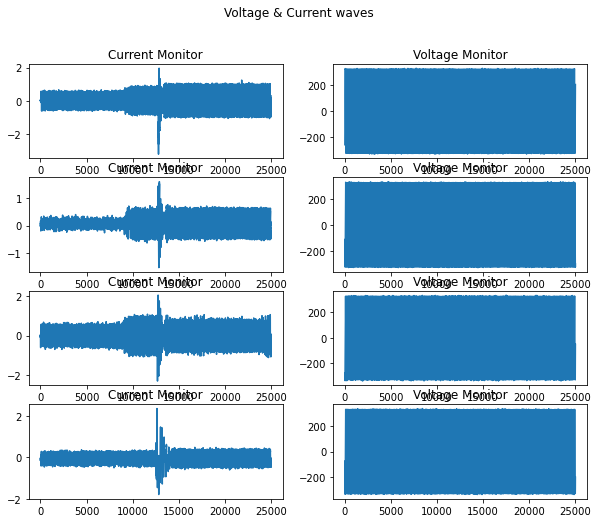

In [65]:
plt.figure(figsize=(10, 2 * num_examples))
plt.suptitle('Voltage & Current waves')

for i, ix in enumerate(idx):
    current, voltage, _, class_nr = dataset[ix]

    plt.subplot(num_examples, 2, i * 2 + 1)
    plt.plot(current)
    plt.title(f'Current {class_type[class_nr]}')

    plt.subplot(num_examples, 2, i * 2 + 2)
    plt.plot(voltage)
    plt.title(f'Voltage {class_type[class_nr]}')

plt.show()

6424
391
1749
390
6348
390
4114
390


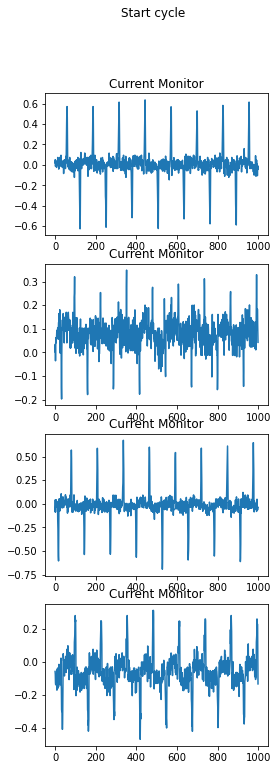

In [66]:
plt.figure(figsize=(4, 3*num_examples))
plt.suptitle('Start cycle')

for i, ix in enumerate(idx):
    current, voltage, _, class_nr = dataset[ix]
    zero_crossings = np.where(np.diff(np.signbit(current)))[0]
    print(len(zero_crossings))
    zero_crossings = np.where(np.diff(np.signbit(voltage)))[0]
    print(len(zero_crossings))
    #current = (current - torch.mean(current)) / torch.std(current)

    plt.subplot(num_examples, 1, i + 1)
    plt.plot(current[:1000])
    plt.title(f'Current {class_type[class_nr]}')

plt.show()

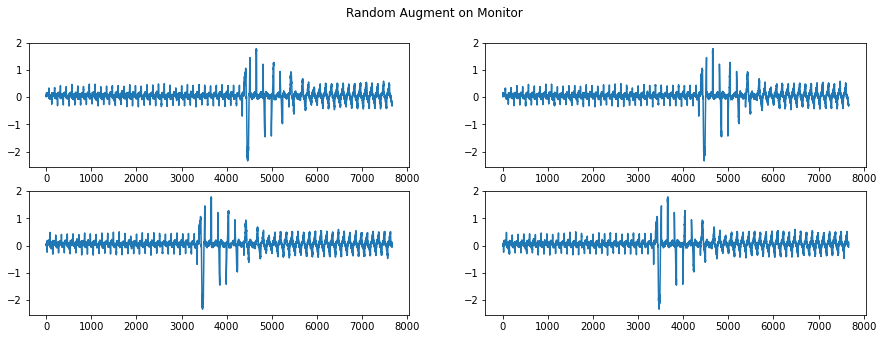

In [67]:
aug = RandomAugment(p_augment=1)

plt.figure(figsize=(15, 5))

sample = dataset[ix]

current, _, _, class_nr = aug(sample)
idx_0 = int(len(current) / 3)
idx_1 = len(current) - idx_0
plt.subplot(2, 2, 1)
plt.suptitle(f'Random Augment on {class_type[class_nr]}')
plt.plot(current[idx_0:idx_1])

current, _, _, class_nr = aug(sample)
plt.subplot(2, 2, 2)
plt.plot(current[idx_0:idx_1])

current, _, _, class_nr = aug(sample)
plt.subplot(2, 2, 3)
plt.plot(current[idx_0:idx_1])

current, _, _, class_nr = aug(sample)
plt.subplot(2, 2, 4)
plt.plot(current[idx_0:idx_1])

plt.show()

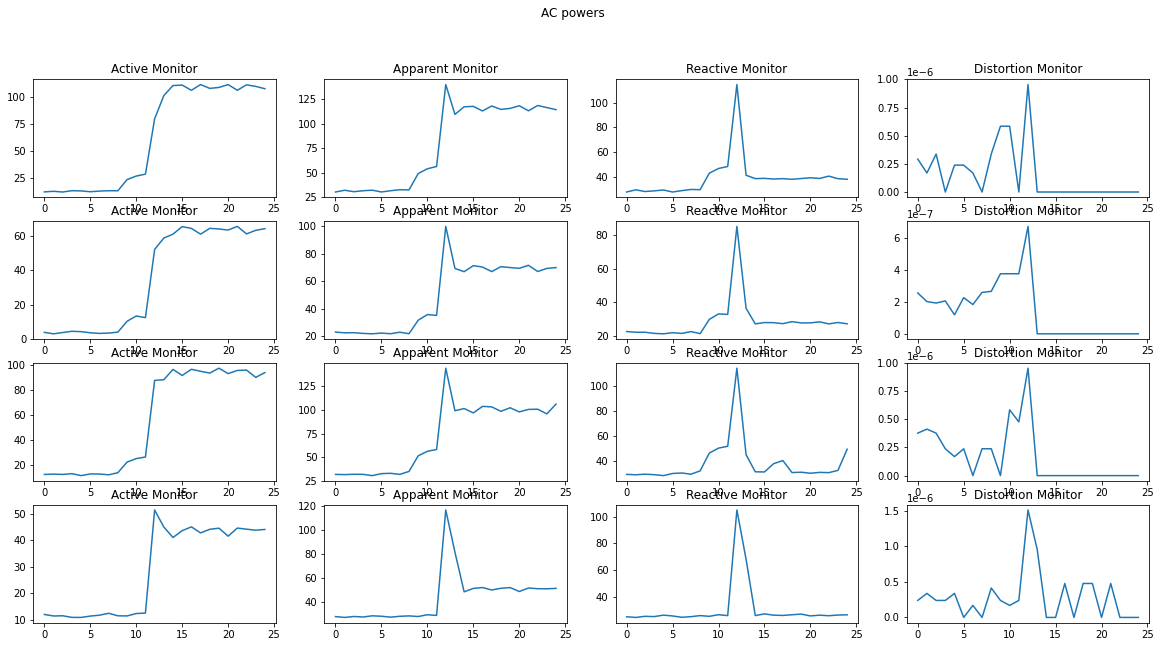

In [68]:
ac = ACPower()

plt.figure(figsize=(10*num_examples/2, 5*num_examples/2))
plt.suptitle(f'AC powers')

for i, ix in enumerate(idx):
    sample = dataset[ix]
    _, _, features, class_nr = ac(sample)

    plt.subplot(num_examples, 4, i*4+1)
    plt.plot(features[0])
    plt.title(f'Active {class_type[class_nr]}')

    plt.subplot(num_examples, 4, i*4+2)
    plt.plot(features[1])
    plt.title(f'Apparent {class_type[class_nr]}')

    plt.subplot(num_examples, 4, i*4+3)
    plt.plot(features[2])
    plt.title(f'Reactive {class_type[class_nr]}')

    plt.subplot(num_examples, 4, i*4+4)
    plt.plot(features[3])
    plt.title(f'Distortion {class_type[class_nr]}')

plt.show()


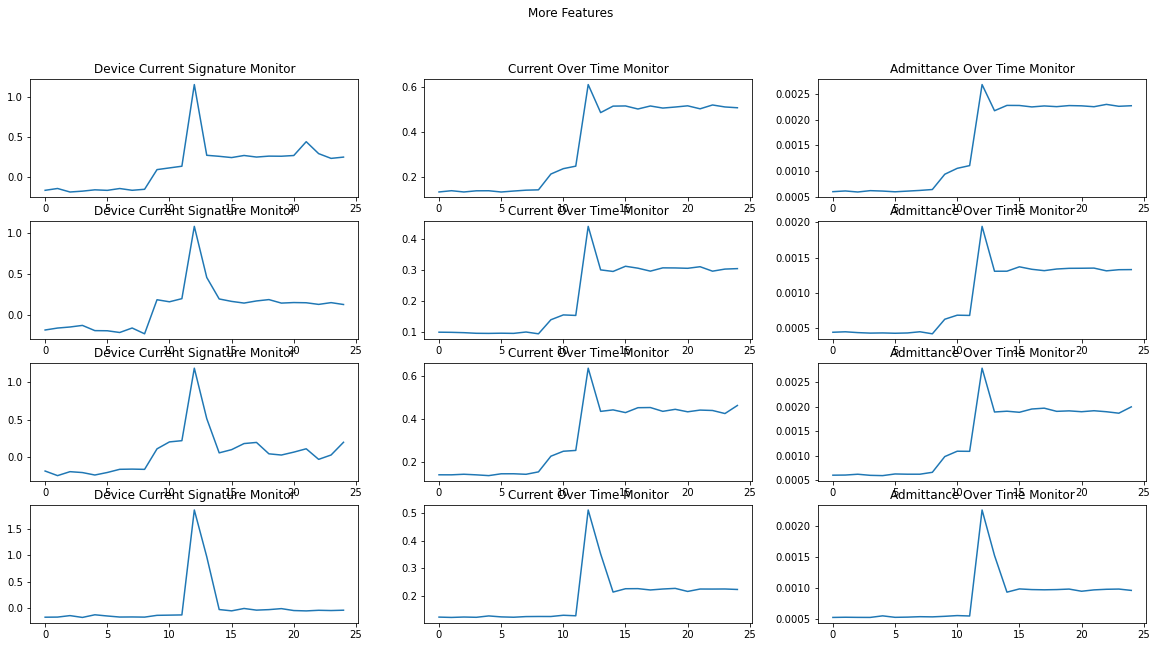

In [69]:
dcs = DCS()
cot = COT()
aot = AOT()

plt.figure(figsize=(10*num_examples/2, 5*num_examples/2))
plt.suptitle(f'More Features')

for i, ix in enumerate(idx):
    sample = dataset[ix]

    _, _, features, class_nr = dcs(sample)
    plt.subplot(num_examples, 3, i*3+1)
    plt.plot(features.squeeze())
    plt.title(f'Device Current Signature {class_type[class_nr]}')

    _, _, features, class_nr = cot(sample)
    plt.subplot(num_examples, 3, i*3+2)
    plt.plot(features.squeeze())
    plt.title(f'Current Over Time {class_type[class_nr]}')

    _, _, features, class_nr = aot(sample)
    plt.subplot(num_examples, 3, i*3+3)
    plt.plot(features.squeeze())
    plt.title(f'Admittance Over Time {class_type[class_nr]}')

plt.show()

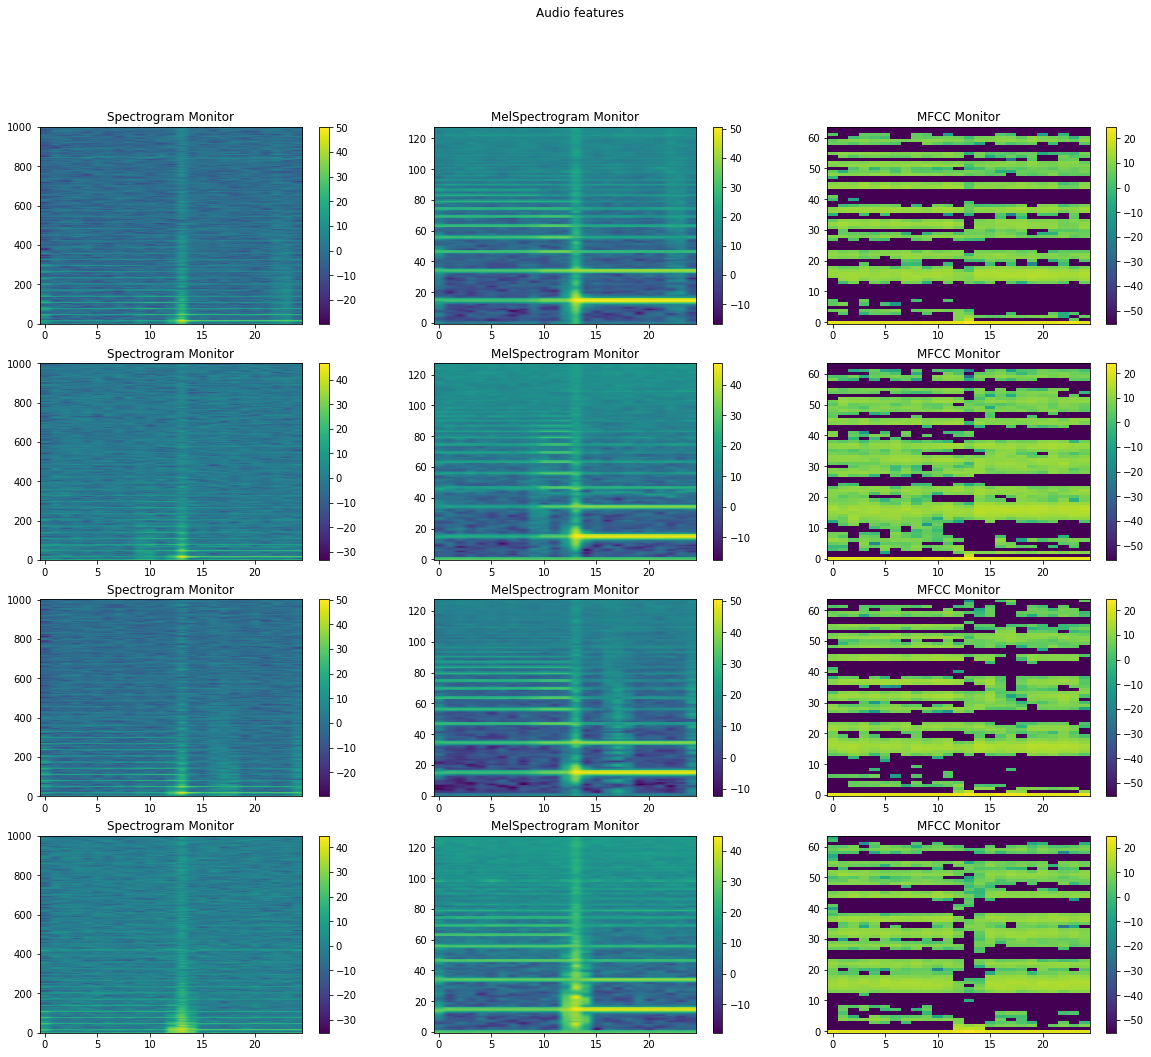

In [70]:
spec = Spectrogram()
mel_spec = MelSpectrogram()
mfcc = MFCC()

plt.figure(figsize=(10*num_examples/2, 5*num_examples/1.2))
plt.suptitle(f'Audio features')

for i, ix in enumerate(idx):
    sample = dataset[ix]

    _, _, features, class_nr = spec(sample)
    plt.subplot(num_examples, 3, i*3+1)
    plt.imshow(librosa.power_to_db(features), origin='lower', aspect='auto')
    plt.colorbar()
    plt.title(f'Spectrogram {class_type[class_nr]}')

    _, _, features, class_nr = mel_spec(sample)
    plt.subplot(num_examples, 3, i*3+2)
    plt.imshow(librosa.power_to_db(features), origin='lower', aspect='auto')
    plt.colorbar()
    plt.title(f'MelSpectrogram {class_type[class_nr]}')

    _, _, features, class_nr = mfcc(sample)
    plt.subplot(num_examples, 3, i*3+3)
    plt.imshow(librosa.power_to_db(features), origin='lower', aspect='auto')
    plt.colorbar()
    plt.title(f'MFCC {class_type[class_nr]}')


plt.show()
